# Car Price Prediction

In this session we will be using the used car data set to explore the various features, do some feature enginering, tune some parameters, create a ML model and store it to use whenever required

The columns in the given dataset are as follows:

Car_Name - Name of the car

Year - Year of Purchase

Selling_Price - Selling Price of the used car in lacs

Present_Price - Selling Price of the new car in lacs

Kms_driven - Total kilometers driven

Fuel - Type of fuels required

Seller_Type -  Type of the Seller

Transmission - Type of transmission

Owner - Number of owners the car had

## Importing the libraries

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Read the data

In [2]:
df = pd.read_csv('../data/car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Basic Information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
# Check for null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
# Descriptive stats for numeric data type

df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
# Descriptive stats for categorical data type

df.describe(exclude=np.number)

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


***Observations:***
 - Year is in integer but its true nature is categorical
 - 32k for a new car price looks odd
 - Owners seem to have a few outliers and it has low variance (because approx. 75% of the values have 0 (meaning 1st owner cars))

## EDA

### Univariate analysis - Numeric features

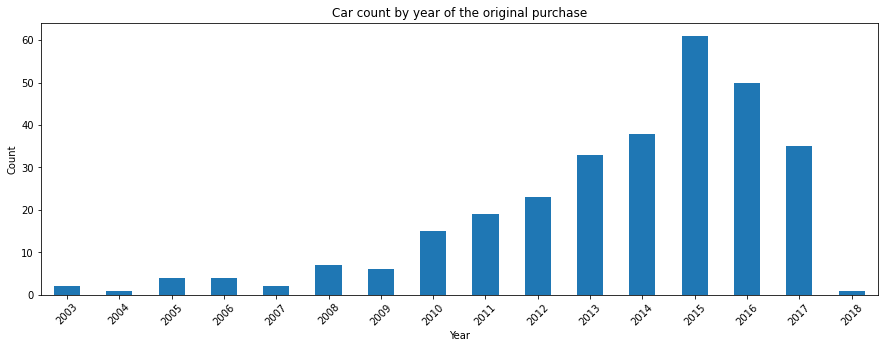

In [7]:
# Number of cars for a given year

df['Year'].value_counts().plot.bar(figsize=(15, 5), rot=45)
plt.title('Car count by year of the original purchase')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

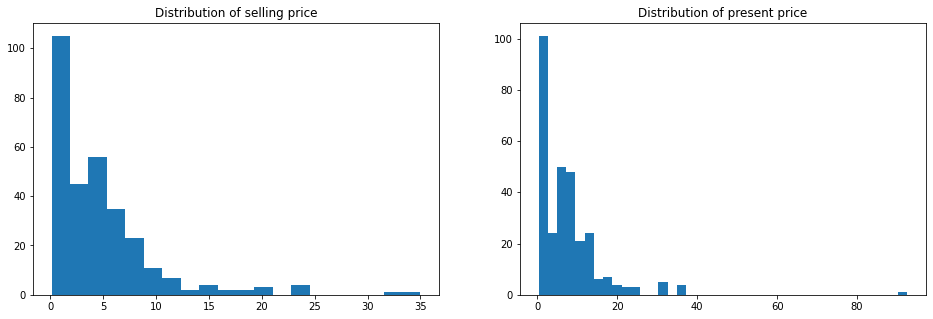

In [8]:
# Distribution of selling price and present price

fig, ax = plt.subplots(1, 2, figsize=(16, 5))
ax = ax.flatten()

ax[0].hist(df['Selling_Price'], bins=20)
ax[0].set_title('Distribution of selling price')

ax[1].hist(df['Present_Price'], bins=40)
ax[1].set_title('Distribution of present price')

plt.show()

In [9]:
# Categorize car w.r.t. its present price

def car_segment(price):
    if price <= 5:
        return 'economical'
    elif price <= 10:
        return 'normal'
    elif price <= 20:
        return 'high-end'
    elif price > 20:
        return 'premium'

In [10]:
df['Car_Segment'] = df['Present_Price'].map(car_segment)

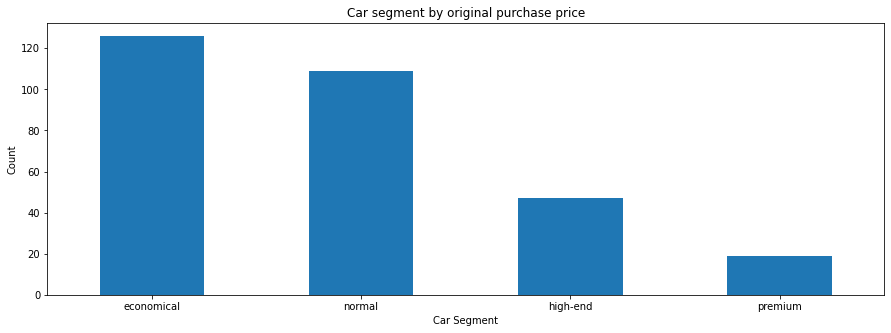

In [11]:
df['Car_Segment'].value_counts().plot.bar(figsize=(15, 5), rot=0)
plt.title('Car segment by original purchase price')
plt.xlabel('Car Segment')
plt.ylabel('Count')
plt.show()

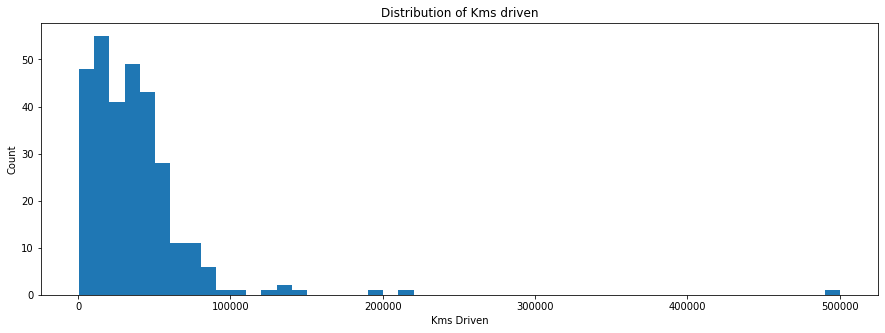

In [12]:
# Distribution of kms driven

df['Kms_Driven'].hist(bins=50, figsize=(15, 5), grid=False)
plt.title('Distribution of Kms driven')
plt.xlabel('Kms Driven')
plt.ylabel('Count')
plt.show()

In [13]:
# Create segments for kms driven

def driven_segment(kms):
    if kms < 10000:
        return 'below_10k'
    elif kms < 30000:
        return 'below_30k'
    elif kms < 50000:
        return 'below_50k'
    elif kms < 100000:
        return 'below_100k'
    elif kms >= 100000:
        return 'above_100k'

In [14]:
df['Driven_Segment'] = df['Kms_Driven'].map(driven_segment)

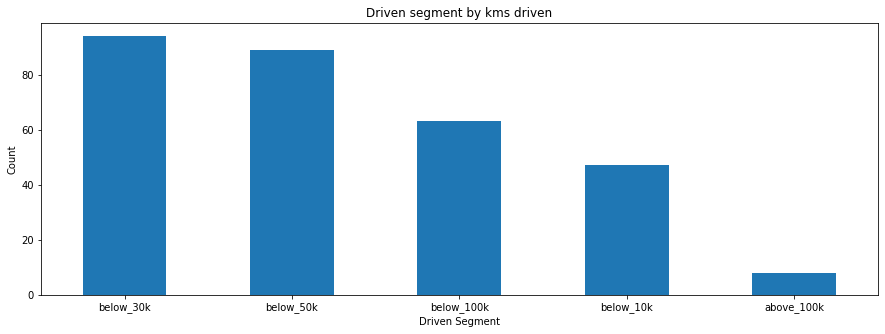

In [15]:
df['Driven_Segment'].value_counts().plot.bar(figsize=(15, 5), rot=0)
plt.title('Driven segment by kms driven')
plt.xlabel('Driven Segment')
plt.ylabel('Count')
plt.show()

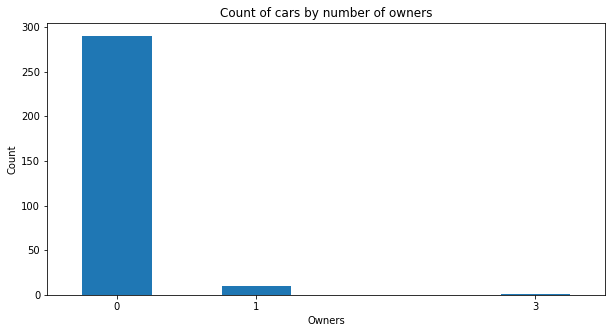

In [16]:
# Count of cars wrt number of owners

df['Owner'].value_counts().plot.bar(figsize=(10, 5), rot=0)
plt.title('Count of cars by number of owners')
plt.xlabel('Owners')
plt.ylabel('Count')
plt.show()

In [17]:
df['Owner'].value_counts(normalize=True) * 100

0    96.345515
1     3.322259
3     0.332226
Name: Owner, dtype: float64

***Observations***
 - 96% of the cars have single owner hence this feature does not have significant variance and will not contribute much in predicting selling price.

### Univariate analysis - Categorical features

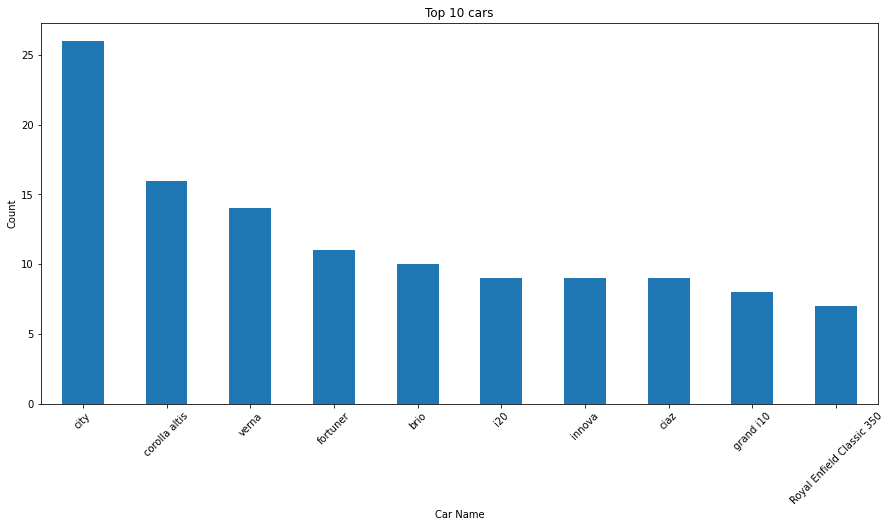

In [18]:
# Plot top 10 cars

df['Car_Name'].value_counts()[:10].plot.bar(figsize=(15, 7), rot=45)
plt.title('Top 10 cars')
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.show()

***Observations***:
 - Royal Enfield is the bike which indicates that data contains bikes informaiton as well

In [19]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

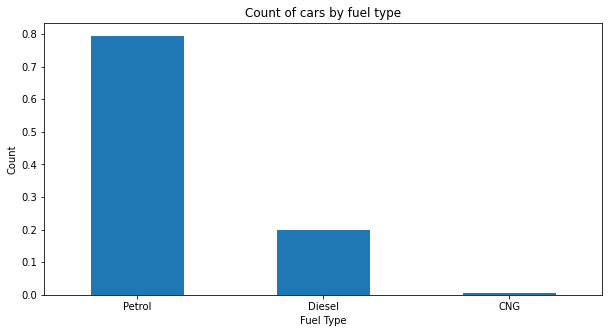

In [20]:
# Value counts by fuel type

df['Fuel_Type'].value_counts(normalize=True).plot.bar(figsize=(10, 5), rot=0)
plt.title('Count of cars by fuel type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

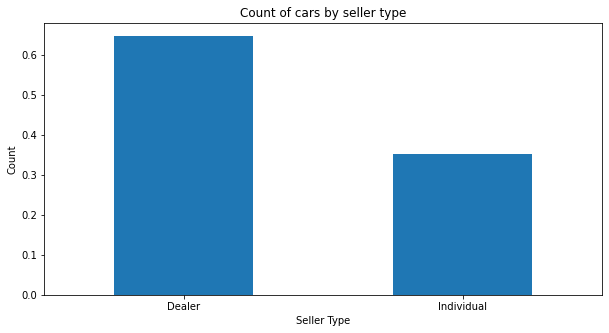

In [21]:
# Value counts by seller type

df['Seller_Type'].value_counts(normalize=True).plot.bar(figsize=(10, 5), rot=0)
plt.title('Count of cars by seller type')
plt.xlabel('Seller Type')
plt.ylabel('Count')
plt.show()

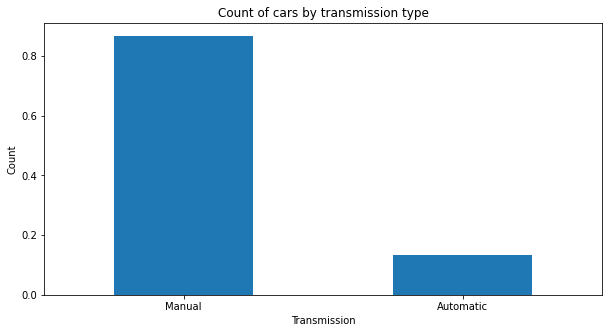

In [22]:
# Value counts by transmission type

df['Transmission'].value_counts(normalize=True).plot.bar(figsize=(10, 5), rot=0)
plt.title('Count of cars by transmission type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

In [23]:
bikes_identifier = [
    'Royal Enfield', 'Bajaj', 'Honda CB', 'Hero', 'Yamaha', 'Activa', 'TVS', 'KTM',
    'Hyosung', 'Honda Karizma', 'Access 125', 'Mahindra Mojo', 'Honda Dream Yuga', 'UM Renegade Mojave'
]

def vehicle_type(name):
    if any(i in name for i in bikes_identifier):
        return 'two_whl'
    
    return 'four_whl'

In [24]:
df['Vehicle_Type'] = df['Car_Name'].map(vehicle_type)

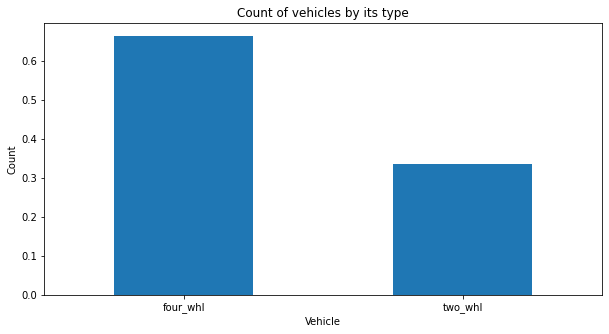

In [25]:
# Value counts by vehicle type

df['Vehicle_Type'].value_counts(normalize=True).plot.bar(figsize=(10, 5), rot=0)
plt.title('Count of vehicles by its type')
plt.xlabel('Vehicle')
plt.ylabel('Count')
plt.show()

***Observations***:
 - Bikes included - Royal Enfield, Bajaj, Honda CB, Hero, Yamaha, Activa, TVS, KTM, Hyosung, Honda Karizma, Access 125, Mahindra Mojo
 - Approx. 80% of the vehicles are on petrol

### Bivariate analysis

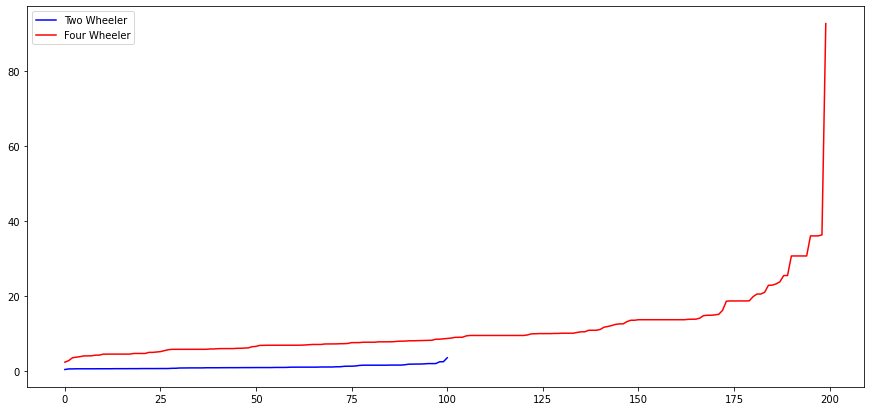

In [26]:
# Plot new purchase price of the bikes and cars

plt.figure(figsize=(15, 7))
plt.plot(np.sort(df[df['Vehicle_Type'] == 'two_whl']['Present_Price']), color='b', label='Two Wheeler')
plt.plot(np.sort(df[df['Vehicle_Type'] == 'four_whl']['Present_Price']), color='r', label='Four Wheeler')
plt.legend()
plt.show()

In [27]:
# Min and max of cars and bikes of present price

df.pivot_table(index='Vehicle_Type', values='Present_Price', aggfunc=['min', 'max'])

,min,max
,Present_Price,Present_Price
Vehicle_Type,,
four_whl,2.28,92.60
two_whl,0.32,3.45


In [28]:
# Average of present price of cars

df[df['Vehicle_Type'] == 'four_whl'].pivot_table(index='Vehicle_Type', values='Present_Price', 
                                                 aggfunc=['median', 'mean'], columns='Car_Segment')

median                               mean                                
Car_Segment  economical high-end normal premium economical   high-end    normal    premium
Vehicle_Type                                                                              
four_whl           4.43     13.6    7.6   30.61     4.1824  14.029362  7.682294  31.307368

In [29]:
# Looking for 4 wheelers under 3 lac

df[(df['Vehicle_Type'] == 'four_whl') & (df['Present_Price'] < 3)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Segment,Driven_Segment,Vehicle_Type
37,800,2003,0.35,2.28,127000,Petrol,Individual,Manual,0,economical,above_100k,four_whl
44,omni,2012,1.25,2.69,50000,Petrol,Dealer,Manual,0,economical,below_100k,four_whl


In [30]:
df['Car_Segment'].unique()

array(['normal', 'economical', 'high-end', 'premium'], dtype=object)

In [31]:
cars = df[df['Vehicle_Type'] == 'four_whl']

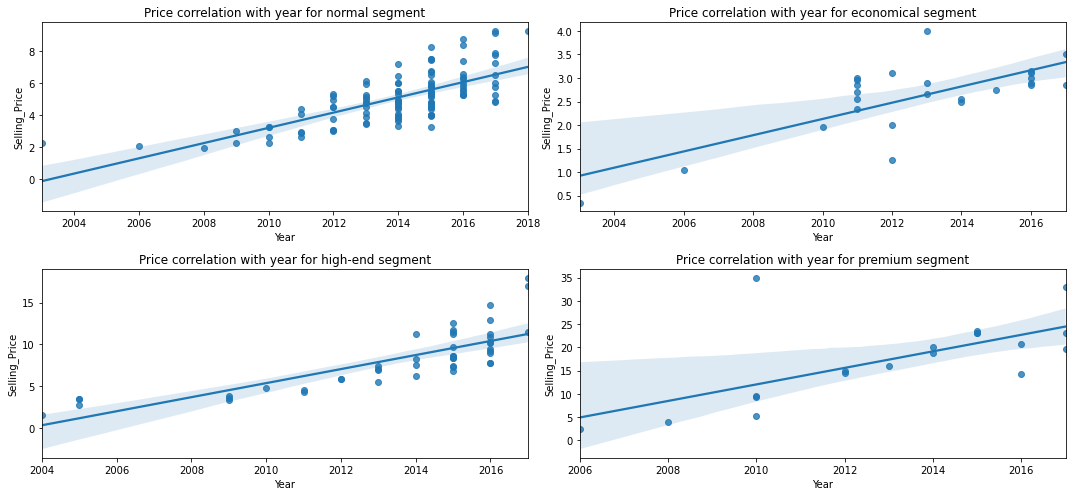

In [32]:
# Correlation between selling price and year

fig, ax = plt.subplots(2, 2, figsize=(15, 7))
ax = ax.flatten()

for i, seg in enumerate(cars['Car_Segment'].unique()):
    car_seg = cars[cars['Car_Segment'] == seg]
    
    sns.regplot(x='Year', y='Selling_Price', data=car_seg, ax=ax[i])
    ax[i].set_title(f'Price correlation with year for {seg} segment')
    
    #ax[i].scatter(car_seg['Year'], car_seg['Selling_Price'])
    #ax[i] = plt.gca().invert_xaxis()

plt.tight_layout()
plt.show()

In [33]:
cars['Driven_Segment'].unique()

array(['below_30k', 'below_50k', 'below_10k', 'below_100k', 'above_100k'],
      dtype=object)

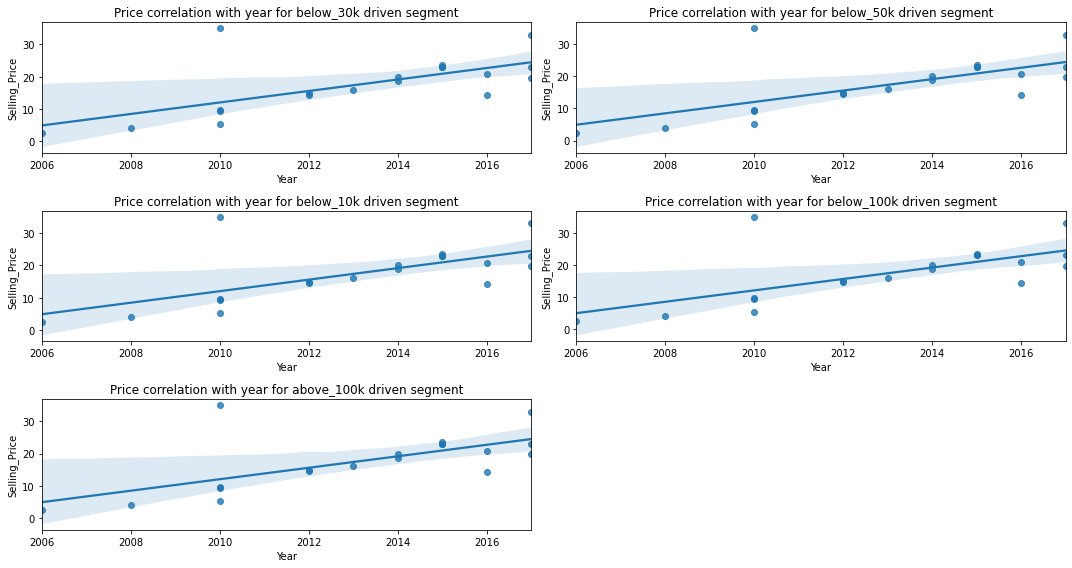

In [34]:
# Correlation between selling price and year w.r.t. kms driven

fig, ax = plt.subplots(3, 2, figsize=(15, 8))
ax = ax.flatten()
fig.delaxes(ax[-1])   # Deleting 6th axis to accomodate 5 subplots

for i, seg in enumerate(cars['Driven_Segment'].unique()):
    car_kms = cars[cars['Driven_Segment'] == seg]
    
    sns.regplot(x='Year', y='Selling_Price', data=car_seg, ax=ax[i])
    ax[i].set_title(f'Price correlation with year for {seg} driven segment')
    
plt.tight_layout()
plt.show()

***Observations:***
 - All of above two subplots shows upward trend and that means the more recent the cars more the price.

### Create a pair plot of the entire data

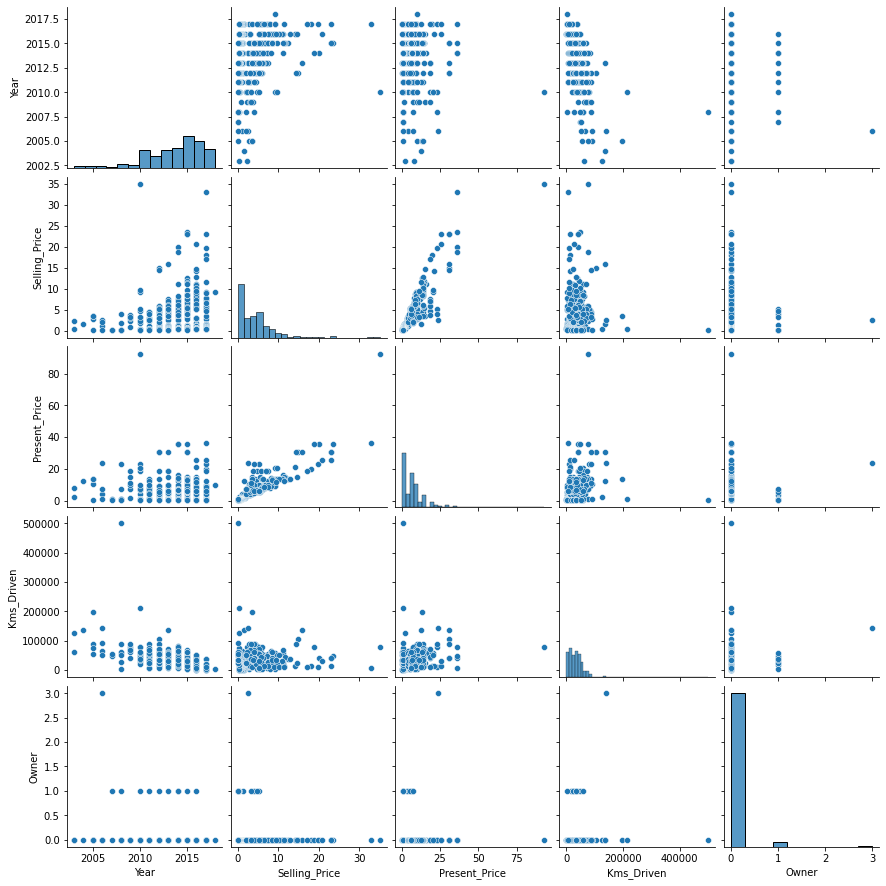

In [35]:
# Pair plot of the entire data

sns.pairplot(df)
plt.show()

In [36]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


Create a new feature which tells us how old the car is in terms of years

## Feature Engineering

In [37]:
# # Subtracting the year by current year
# cars['no_of_years'] = 2021 - cars['Year']
# cars.head()

## Feature Encoding

In [38]:
# Create features and target (consider only cars data)

X = cars.drop(['Car_Name', 'Car_Segment', 'Driven_Segment', 'Selling_Price', 'Owner'], axis=1)
y = cars['Selling_Price']

In [39]:
# Categorical feature encoding

X_OHE = pd.get_dummies(X, drop_first=True)
X_OHE.head()

,Year,Present_Price,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,1,0,1
1,2013,9.54,43000,1,0,0,1
2,2017,9.85,6900,0,1,0,1
3,2011,4.15,5200,0,1,0,1
4,2014,6.87,42450,1,0,0,1


In [40]:
# Split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_OHE, y, test_size=0.2, random_state=10)

## Model Building and Evaluating

In [41]:
lr = LinearRegression()
ls = Lasso()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()

In [42]:
# Loop over models and calculate RMSE

models = [('Linear Regression', lr), ('Lasso', ls), ('Random Forest', rfr), ('Gradient Boosting', gbr)]

for m in models:
    model = m[1]
    name = m[0]
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f'RMSE for {name}: ')
    print(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

RMSE for Linear Regression: 
1.6804
RMSE for Lasso: 
1.918
RMSE for Random Forest: 
1.1326
RMSE for Gradient Boosting: 
0.9866


***Note:***
 - Scaling is required for parametric models (e.g. linear regression, logistic regression --have certain assumption about data), however non-parametric models such as decision trees, random forest, gradient boosting etc. does not require to scale the data.

### Randomized Search CV on the GBR model, find out the best parameters and the results as well

In [43]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# Initalizing the RandomSearchCV
gbr_random = RandomizedSearchCV(estimator=gbr, param_distributions=random_grid,
                                scoring='neg_mean_squared_error', n_iter=10, cv=5, 
                                verbose=2, random_state=42, n_jobs=1)

In [46]:
# Fitting the data
gbr_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [47]:
gbr_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [48]:
# Getting the predictions
y_pred = gbr_random.predict(X_test)

print('RMSE for Fine tuned GBR: ')
print(round(np.sqrt(mean_squared_error(y_test, y_pred)), 4))

RMSE for Fine tuned GBR: 
1.254


## Package your model using pickle and store it

In [49]:
import pickle

# Open a file, where you ant to store the data
with open('gradient_boost_regression_model.pkl', 'wb') as f:
    # Dump information to that file
    pickle.dump(gbr_random, f)